In [1]:
import collections
import math
import re
import requests
import json
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from personal import SESSION, LEADERBOARD_URL

In [3]:
data = json.loads(requests.get(
    LEADERBOARD_URL,
    cookies = {'session': SESSION},
).text)

In [4]:
df = pd.DataFrame(data['members']).T.sort_values(by='local_score', ascending=False)
df['name'].replace(np.nan, 'Unknown', inplace=True)
df = df.set_index('name', drop=True)

In [5]:
days_keys = range(1, datetime.now().day+1)

In [6]:
for i in days_keys:
    df[f'{i!s}#1'] = 0
    df[f'{i!s}#2'] = 0
    df[f'{i!s}#1.classement'] = 0
    df[f'{i!s}#2.classement'] = 0
    df[f'{i!s}.duration'] = 0
    df[f'{i!s}.pts'] = 0

In [7]:
for idv,v in df['completion_day_level'].iteritems():
    for day, stars in v.items():
        for star, time in stars.items():
            df.loc[idv, f'{day!s}#{star!s}'] = int(time['get_star_ts'])

In [8]:
del df['completion_day_level']

In [9]:
pts_memory = [0]*len(df)
for i in days_keys:
    for j in range(1, 3):
        # order
        order = list(filter(lambda x: x > 0, set(df[f'{i}#{j}'].values)))
        order.sort()
        df[f'{i}#{j}.classement'] = [order.index(v)+1 if v in order else len(order)+1 for v in df[f'{i}#{j}']]
        df[f'{i}#{j}.pts'] = [len(df)-order.index(v) if v in order else 0 for v in df[f'{i}#{j}']]
        
    if i > 1: # No points for first day
        # duration
        df[f'{i!s}.duration'] = round((df[f'{i!s}#2'] - df[f'{i!s}#1'])/60, 2)
        df[f'{i!s}.duration'][df[f'{i!s}.duration'] <= 0] = np.NaN
        pts_memory = df[f'{i}#1.pts'] + df[f'{i}#2.pts'] + pts_memory
        df[f'{i!s}.pts'] = pts_memory
        # total order
        total_order = list(filter(lambda x: x > 0, set(df[f'{i!s}.pts'].values)))
        total_order.sort(reverse=True)
        df[f'{i}.classement'] = [total_order.index(v)+1 if v in total_order else len(total_order)+1 for v in df[f'{i!s}.pts']]

<ipython-input-9-a8cd10ca20d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{i!s}.duration'][df[f'{i!s}.duration'] <= 0] = np.NaN


In [10]:
df.filter(regex=(r'^\d+?\.pts$'))

,1.pts,2.pts,3.pts,4.pts,5.pts,6.pts,7.pts,8.pts,9.pts
name,,,,,,,,,
Alexandre Dewilde,0,46,108,170,234,292,350,413,476
Thibaultofc,0,60,114,172,220,282,346,401,401
Olivier Goletti,0,64,120,178,232,285,341,399,399
Eliott Lafargue,0,37,101,154,216,277,277,337,397
Brieuc Dubois,0,20,43,72,132,195,257,320,383
demeeusdarco,0,55,113,147,199,249,309,363,363
H DGD,0,44,96,159,205,247,296,349,349
SebStreb,0,58,95,144,170,204,246,294,294
HÃ©lÃ¨ne Verhaeghe (Ln x),0,54,98,132,160,196,245,291,291


## Classement journalier

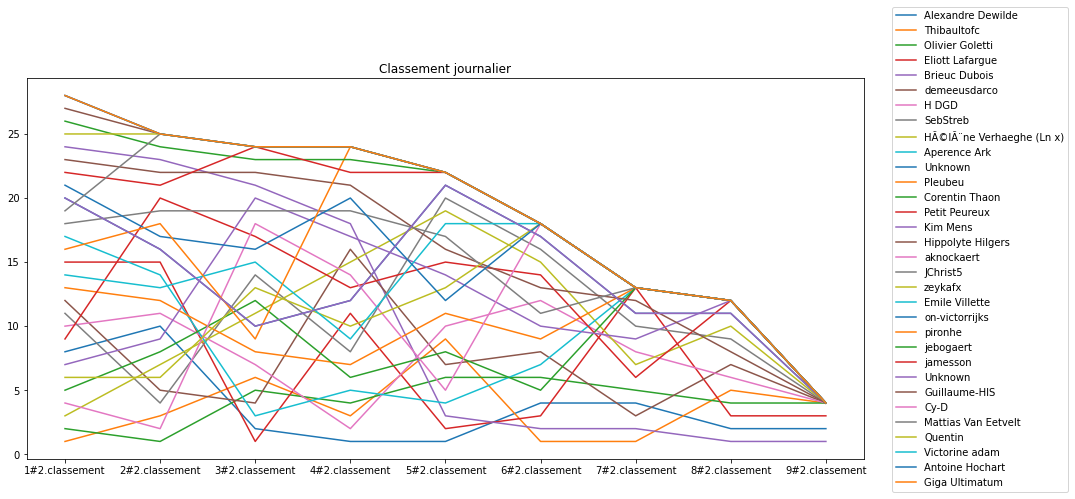

In [11]:
plt.figure(figsize=(15, 7))
plt.title('Classement journalier')
for name, data in df.filter(regex=(r'\d+?#2\.classement')).iterrows():
    plt.plot(data, label=name)
_ = plt.legend(bbox_to_anchor=(1.25, -0.1), loc="lower right")

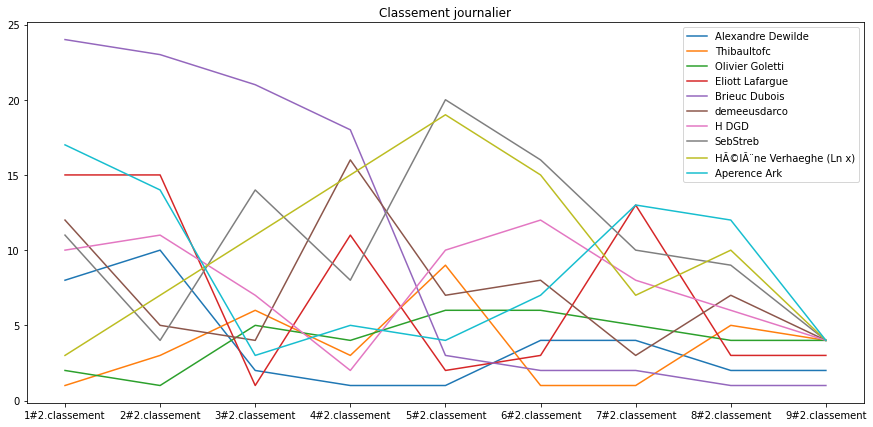

In [12]:
plt.figure(figsize=(15, 7))
plt.title('Classement journalier')
for name, data in df.filter(regex=(r'\d+?#2\.classement')).head(10).iterrows():
    plt.plot(data, label=name)
_ = plt.legend()

## Durée entre le premier le second exercice

In [26]:
watch_list = ['Alexandre Dewilde', 'Brieuc Dubois']

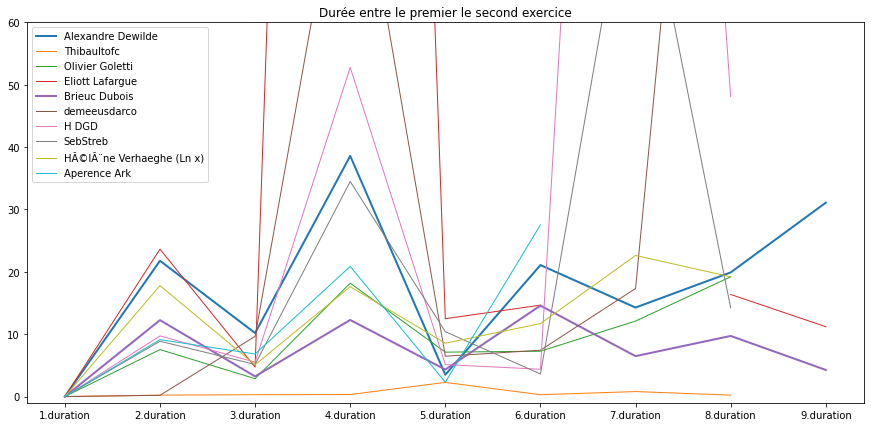

In [28]:
plt.figure(figsize=(15, 7))
plt.title('Durée entre le premier le second exercice')
plt.ylim(-1, 60)
#plt.yscale('log', basey=2)
for name, data in df.filter(regex=(r'\d+?\.duration')).head(10).iterrows():
    if name in watch_list:
        lw = 2
    else:
        lw = 1
    plt.plot(data, label=name, linewidth=lw)
_ = plt.legend()

## Évolution du classement

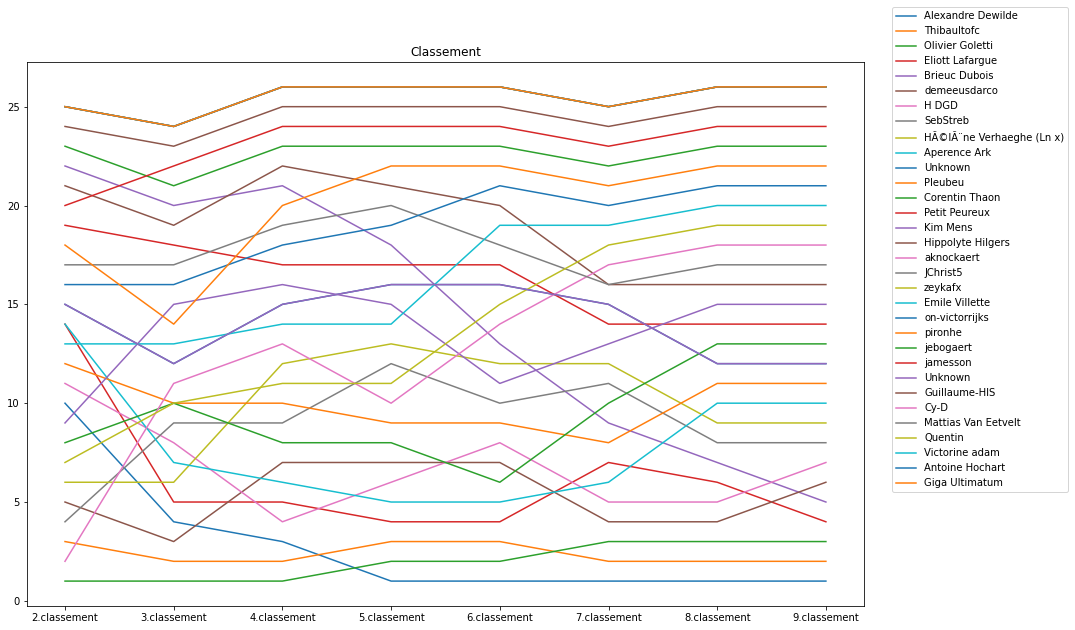

In [14]:
plt.figure(figsize=(15, 10))
plt.title('Classement')
for name, data in df.filter(regex=(r'^\d+?\.classement$')).iterrows():
    plt.plot(data, label=name)
_ = plt.legend(bbox_to_anchor=(1.25, 0.2), loc="lower right")

In [15]:
1607490566-1607490465

101

In [16]:
df.loc['Brieuc Dubois']['9.duration']

4.27

In [17]:
df.loc['Alexandre Dewilde']['9.duration']

31.08

In [21]:
(1607492753 - 1607492330)/60

7.05

In [22]:
df['9.duration']

name
Alexandre Dewilde            31.08
Thibaultofc                    NaN
Olivier Goletti                NaN
Eliott Lafargue              11.20
Brieuc Dubois                 4.27
demeeusdarco                   NaN
H DGD                          NaN
SebStreb                       NaN
HÃ©lÃ¨ne Verhaeghe (Ln x)      NaN
Aperence Ark                   NaN
Unknown                        NaN
Pleubeu                        NaN
Corentin Thaon                 NaN
Petit Peureux                  NaN
Kim Mens                       NaN
Hippolyte Hilgers              NaN
aknockaert                     NaN
JChrist5                       NaN
zeykafx                        NaN
Emile Villette                 NaN
on-victorrijks                 NaN
pironhe                        NaN
jebogaert                      NaN
jamesson                       NaN
Unknown                        NaN
Guillaume-HIS                  NaN
Cy-D                           NaN
Mattias Van Eetvelt            NaN
Quentin        